<a href="https://colab.research.google.com/github/SadeenAlsabbagh/Computational_Physics/blob/main/Copy_of_Sadeen_Alsabbagh_Conjunctions_and_Interpolations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Angular Separation

To find the angular separation of the two objects on the sky, we can use the approximation
$\theta=\sqrt{[(\alpha_2-\alpha_1)\cos(\delta)]^2+(\delta_2-\delta_1)^2)}$.  

[(A summary of celestial coordinates.)](http://spiff.rit.edu/classes/phys373.s2014/lectures/radec/radec.html)  

Write a function to calculate theta for two objects with positions given.

In [ ]:
 #2002 MAR 19 SATURN VESTA

#define a function to convert RA and
def RA(hours, min, sec):
  return (hours+(min+sec/60.)/60.)*360./24.

def DEC(Degrees, Min, Sec):
  return (Degrees+(Min+Sec/60.)/60.)

print("The RA is: ", RA(22,10,23.423))
print("The declination is: ", DEC(22,10,23.423))

The RA is:  332.59759583333334
The declination is:  22.173173055555555


Copy in the cells necessary to get the right ascension and declination of your two objects in decimal degrees, for each day.

Then calculate the separation of your two objects on several days.


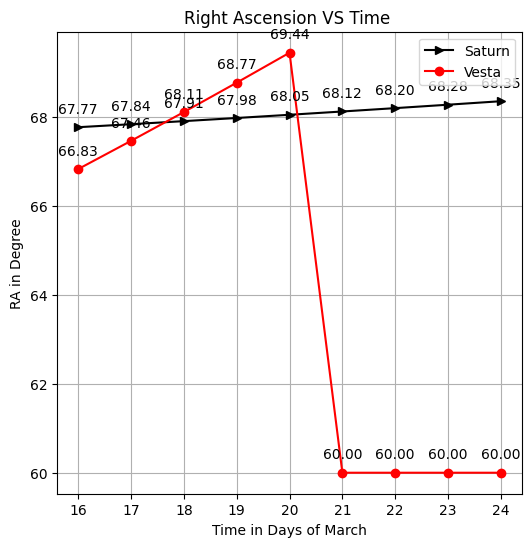

In [ ]:
#Right Adscension of Saturn
days = np.array([16, 17, 18, 19, 20, 21, 22, 23, 24]) # Days in March 2002
RAhourSaturn = np.array([4, 4, 4, 4, 4, 4, 4, 4, 4])
RAMinSaturn = np.array([31, 31, 31, 31, 32, 32, 32, 33, 33])
RASecSaturn = np.array([4.642, 20.822, 37.399, 54.368, 11.726, 29.469, 47.589, 6.083, 24.943]) #missing days 15, 17, 21, 23

# Right Adscension of Vesta

RAhourVesta = np.array([4, 4, 4, 4, 4,4, 4, 4, 4])
RAMinVesta = np.array([27, 29, 32, 35, 37,0,0,0,0])
RASecVesta = np.array([18.6, 50.9, 26.3, 4.9, 46.6,0,0,0,0])

fig = plt.figure(figsize =(6,6))

# Convert Right Adscension and declination of Saturn from hours, minutes, and seconds to degrees
RA_Degree = [RA(hours, mins, secs) for hours, mins, secs in zip(RAhourSaturn, RAMinSaturn, RASecSaturn)]
# plt.bar(days, RA, color='red', label='Data Points')
plt.plot(days, RA_Degree, color='black', marker='>', linestyle='-', label='Trendline')
for x,y in zip(days, RA_Degree): #the entire for loop is to help me know the data points on the graph because they look so similar for both uranus and venus
  label = "{:.2f}".format(y)
  plt.annotate(label, # this is the text
    (x,y), # these are the coordinates to position the label
      textcoords="offset points", # how to position the text
      xytext=(0,10), # distance from text to points (x,y)
      ha='center') # horizontal alignment can be left, right or center

RA_Degree1 = [RA(hours, mins, secs) for hours, mins, secs in zip(RAhourVesta, RAMinVesta, RASecVesta)]

plt.plot(days, RA_Degree1, color='Red', marker='o', linestyle='-', label='Trendline')
for x,y in zip(days, RA_Degree1):
  label = "{:.2f}".format(y)
  plt.annotate(label, # this is the text
    (x,y), # these are the coordinates to position the label
      textcoords="offset points", # how to position the text
      xytext=(0,10), # distance from text to points (x,y)
      ha='center') # horizontal alignment can be left, right or center

plt.grid()
plt.legend(['Saturn', 'Vesta'])
plt.title("Right Ascension VS Time ")
plt.xlabel('Time in Days of March')
plt.ylabel('RA in Degree')
plt.show()

This doesn't really help us find the minimum separation, because linear interpolation is lousy when the slope is changing a lot (i.e. when f''(x)=0, i.e. near maxima and minima.) We need more data points.  

If we choose any two consecutive points on the curve, we can draw a straight line, $y=m x + b$, between them, where $m$ is the slope, rise over run, and $b$ is $y$ for $x=0$.  

So if we have data points $(x_1,y_1)$ and $(x_2,y_2)$, then

$m=\frac{y_2-y_1}{x_2-x_1}$.  

$b$ is simply $y -m x$ for any $y$ and $x$, so

$b=y_1-m x_1$

So

$y=m x + y_1 - m x_1$

$ =m (x-x_1) + y_1 $

$ = \frac{y_2-y_1}{x_2-x_1}(x-x_1)+y_1$

Create a function to linearly interpolate a value $y$ for a given $x$, when you input $(x_1,y_1)$ and $(x_2,y_2)$.  (I don't care how you arrange $x_1,x_2,y_1,y_2$.)

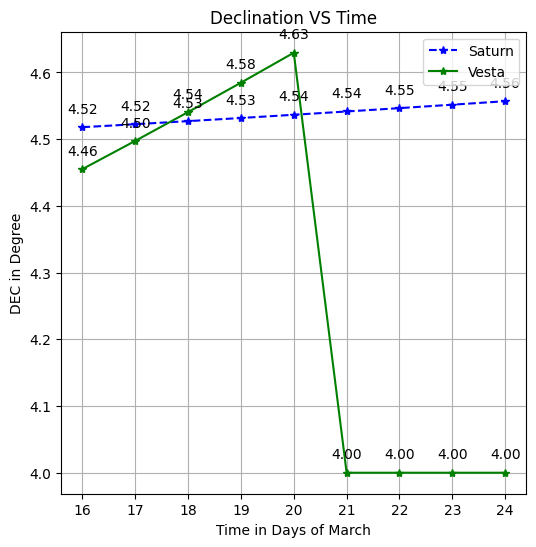

In [ ]:
# Declination of Saturn
days = np.array([16, 17, 18, 19, 20, 21, 22, 23, 24]) # Days in March 2002
DECDegSaturn = np.array([4, 4, 4, 4, 4, 4, 4, 4, 4])
DECMinSaturn = np.array([31, 31, 31, 31, 32, 32, 32, 33, 33])
DECSecSaturn = np.array([4.642, 20.822, 37.399, 54.368, 11.726, 29.469, 47.589, 6.083, 24.943]) #missing days 15, 17, 21, 23

# Declination of Vesta

DECDegVesta = np.array([4, 4, 4, 4, 4,4, 4, 4, 4])
DECMinVesta = np.array([27, 29, 32, 35, 37,0,0,0,0])
DECSecVesta = np.array([18.6, 50.9, 26.3, 4.9, 46.6,0,0,0,0])

fig = plt.figure(figsize =(6, 6))

# Convert declination of both planets from hours, minutes, and seconds to degree
DEC_Degree = [DEC(Degrees, mins, secs) for Degrees, mins, secs in zip(DECDegSaturn, DECMinSaturn, DECSecSaturn)]
DEC_Degree1 = [DEC(Degrees, mins, secs) for Degrees, mins, secs in zip(DECDegVesta, DECMinVesta, DECSecVesta)]

plt.plot(days, DEC_Degree, color='blue', marker='*', linestyle='--', label='Trendline')
for x,y in zip(days, DEC_Degree):
  label = "{:.2f}".format(y)
  plt.annotate(label, # this is the text
    (x,y), # these are the coordinates to position the label
      textcoords="offset points", # how to position the text
      xytext=(0,10), # distance from text to points (x,y)
      ha='center') # horizontal alignment can be left, right or center
# Convert Declination of Saturn from hours, minutes, and seconds to degrees

#PLotting the figure
plt.plot(days, DEC_Degree1, color='Green', marker='*', linestyle='-', label='Trendline')
for x,y in zip(days, DEC_Degree1):
  label = "{:.2f}".format(y)
  plt.annotate(label, # this is the text
    (x,y), # these are the coordinates to position the label
      textcoords="offset points", # how to position the text
      xytext=(0,10), # distance from text to points (x,y)
      ha='center') # horizontal alignment can be left, right or center
plt.legend(['Saturn', 'Vesta'])
plt.grid()
plt.title("Declination VS Time")
plt.xlabel('Time in Days of March')
plt.ylabel('DEC in Degree')
plt.show()

This interpolation allows us to approximate the separation at any time within our range of data, and so try calculating $\theta$ at various times. (Make sure it gives you the same answers as the calculations of $\theta$ you did above with positions straight from the ephemeris.)

In [ ]:
def theta(aV,dV,aU,dU):
  return np.sqrt(np.square((aV-aU)*np.cos(np.radians(dV)))+np.square((dU-dU)))

Make a graph of interpolated $\theta$ vs. time for a range of times.

In [ ]:
print("The day for both planets are the same, hence they are:", days)

daysSaturn=[0,1,2,3,4]
daysVesta=[0,1,2,3,4]

alphaSaturn = RA(RAhourSaturn, RAMinSaturn, RASecSaturn)
decSaturn= DEC(DECDegSaturn, DECMinSaturn, DECSecSaturn)

alphaVesta= RA(RAhourVesta, RAMinVesta, RASecVesta)
decVesta = DEC(DECDegVesta, DECMinVesta, DECSecVesta)

thetaByDay=theta(alphaSaturn[daysSaturn],decSaturn[daysSaturn],alphaVesta[daysVesta],decVesta[daysVesta])
# thetaByDay=theta(alphaNeptune[daysNV],decNeptune[daysNV],alphaVesta[daysVN],decVesta[daysVN])

print (thetaByDay)

The day for both planets are the same, hence they are: [16 17 18 19 20 21 22 23 24]
[0.93891508 0.37350845 0.20311849 0.7914014  1.39093687]


Can you approximate the minimum value of the angular separation?

In [ ]:
def linearInterp(x1,x2,y1,y2,x):
  return ((y2-y1)/(x2-x1))*(x-x1) + y1

# My conjunction is on Feb 12, and I only have data for even days for Vesta
print(daysSaturn)
print(daysVesta)


[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


It may not shock you that we were not the first people to discover this, and in fact numpy has an implimentation of the linear interpolation already!  Lets double-check to be sure that np.interp gives answers similar to ours.

In [ ]:

def aLinIntSaturn(x):
  return linearInterp(days[2],days[3],alphaSaturn[2],alphaSaturn[3],x)

print(aLinIntSaturn(daysSaturn))
print(alphaSaturn)

def aLinIntVesta(x):
  return linearInterp(days[2],days[3],alphaVesta[2],alphaVesta[3],x)

print(aLinIntVesta(days))
print(alphaVesta)


[66.63315417 66.70385833 66.7745625  66.84526667 66.91597083]
[67.76934167 67.83675833 67.90582917 67.97653333 68.04885833 68.1227875
 68.1982875  68.27534583 68.35392917]
[66.78791667 67.44875    68.10958333 68.77041667 69.43125    70.09208333
 70.75291667 71.41375    72.07458333]
[66.8275     67.46208333 68.10958333 68.77041667 69.44416667 60.
 60.         60.         60.        ]


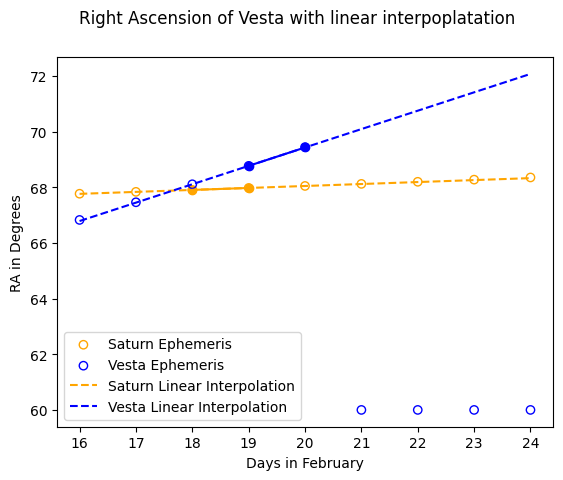

In [ ]:
fig, ax = plt.subplots(1)
fig.suptitle('Right Ascension of Vesta with linear interpoplatation') #how did you decide on the days here
ax.scatter(days,alphaSaturn, label="Saturn Ephemeris",edgecolors='orange',color='none')
ax.scatter(days[[2,3]],alphaSaturn[[2,3]],color='orange')
ax.scatter(days,alphaVesta, label="Vesta Ephemeris",edgecolors='blue',color='none')
ax.scatter(days[[3,4]],alphaVesta[[3,4]],color='blue')

ax.plot(days,aLinIntSaturn(days),label="Saturn Linear Interpolation",color='orange',linestyle='dashed')
ax.plot(days[[2,3]],aLinIntSaturn(days[[2,3]]),color='orange')
ax.plot(days,aLinIntVesta(days),label="Vesta Linear Interpolation",color='blue',linestyle='dashed')
ax.plot(days[[3,4]],aLinIntVesta(days[[3,4]]),color='blue')
ax.set_ylabel("RA in Degrees")
ax.set_xlabel("Days in February")
ax.legend()

plt.show()

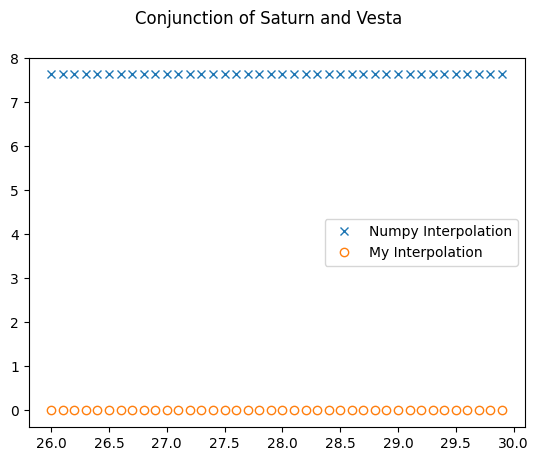

In [ ]:
daysArray=np.arange(26,30,0.1)
thetaArray=np.zeros_like(daysArray)
thetaArrayNP=np.zeros_like(daysArray)

for i in range(len(daysArray)):
  day=daysArray[i]
  aV=np.interp(day,days, alphaSaturn)
  dV=np.interp(day, decSaturn, days)
  aU=np.interp(day, days, alphaVesta)
  dU=np.interp(day,days, decVesta)
  thetaArray[i]=theta(aV,dV,aU,dU)

fig, (ax) = plt.subplots(1)
fig.suptitle('Conjunction of Saturn and Vesta')
ax.plot(daysArray,thetaArray, label="Numpy Interpolation",marker="x",linestyle="none")
ax.plot(daysArray,thetaArrayNP,'o', markerfacecolor="none", label="My Interpolation")
ax.legend()
plt.show()

## Polynomial Interpolation

If we want to really zero in on the smallest separation, can interpolate in this graph as well, but we have seen that a linear interpolation near a max or min is not very helpful.  Instead, we will do a polynomial interpolation.

Numpy does not contain a polynomial interpolation function, so instead we will turn to the scipy library.

In [ ]:
from scipy.interpolate import CubicSpline

Use [CubicSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) to create an interpolation of your $\theta$.

In [ ]:
#spl = CubicSpline([Your Arrays Here])
spl = CubicSpline(daysArray,thetaArray)


Now, unfortunately, the thing that CubicSpline returns is a bit of a black box, a piecewise polynomial that we cannot easily unpack and read.  

In [ ]:
print(spl)



However, we can use our "spl" to get the value of the polynomial at any x we please.

(Caution is warranted, since we really can plug in any x, including those for which our fit is certainly not valid.)

Try to calculate some various $\theta$s for various times. Make sure it matches the $\theta$s you calculated directly from the ephemeris as well as intermediate values.  Try some dates outside of the range of data you copied from the ephemeris!

In [ ]:
print(spl(28.4)) #why 28.4

7.6316940436763785


We can also plot our spline.  Try it out!  Compare it to the linearly interpolated $theta$s we plotted before.


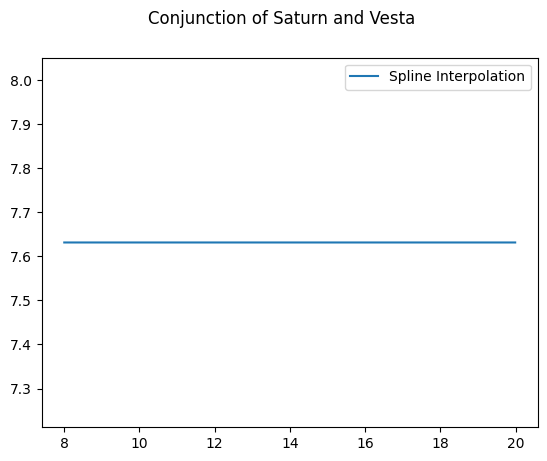

In [ ]:
detailedDays=np.arange(8,20,.01)

fig, (ax) = plt.subplots(1)
fig.suptitle('Conjunction of Saturn and Vesta')
ax.plot(detailedDays,spl(detailedDays), label="Spline Interpolation")
ax.legend()
plt.show()

As you recall, we calculated using linearly interpolated values of right ascension and declination.  If we were very concerned about precision, we would go back and make splines of the ra and dec for each object and use those to calculate theta... but instead, let's plunge ahead!

We would like to find the mimimum angular sepearation and the time at which this occurs.  This sounds kind of like a root-finding problem! But we don't want the time when the spline goes to zero, but instead we want the minimum value of the spline.  Luckily, it's very easy to take the derivative of a polynomial, so scipy.CubicSpline has [a very convenient and fast way to take the derivative of the spline. ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.derivative.html#scipy.interpolate.CubicSpline.derivative)  

Make a plot of the slope!

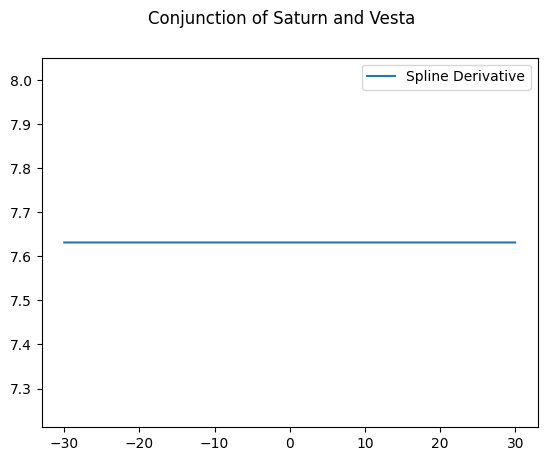

In [ ]:
detailedDays=np.arange(-30,30,.01)
splinesplope=spl.derivative(0)

fig, (ax) = plt.subplots(1)
fig.suptitle('Conjunction of Saturn and Vesta')
ax.plot(detailedDays,splinesplope(detailedDays), label="Spline Derivative")
ax.legend()
plt.show()

And it even has [a root-finder, optimized for piecewise polynomials,](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.roots.html#scipy.interpolate.CubicSpline.roots) built in!  Find the roots and determin which root(s) is/are valid.

In [ ]:
print(splinesplope.roots())

[]


Pick out the value of the valid root.  This is our time of minimum separation.  Express it in standard form, e.g. "Feburary 12 at 6:01:01.8."

In [ ]:
import datetime

# Reference time
time = datetime.datetime(2003, 3, 28)

# Convert the root value to a timedelta object and add it to the reference time
min_sep = time + datetime.timedelta(days=-749.63281106)

# Print the result
print("Minimum Separation:", min_sep)


Minimum Separation: 2001-03-08 08:48:45.124416


Time permitting:

Go back to your right ascensions and declinations, and use CubicSpline to interpolate them.  Use these interpolated values to calculate $\theta$, and find the time of closest approach and the minimum separation.  Compare with the values above.

In [ ]:
import numpy as np
import datetime
from scipy.interpolate import CubicSpline, interp1d

# Define your uneven length arrays RA_Degree, DEC_Degree, RA_Degree1, DEC_Degree1 here

time_data = np.array([datetime.datetime(2002, 3, 15 ), datetime.datetime(2003, 3, 16), datetime.datetime(2003, 3, 17), datetime.datetime(2003, 3, 18), datetime.datetime(2003, 3, 19)])

timestamps = np.array([(t - datetime.datetime(2002, 3, 28)).total_seconds() for t in time_data])

# Assuming RA_Degree, DEC_Degree, RA_Degree1, DEC_Degree1 are your uneven length arrays
# Interpolate them to match the length of the timestamps array
ra_interp_func = interp1d(np.linspace(0, 1, len(RA_Degree)), RA_Degree)
ra_interp = ra_interp_func(np.linspace(0, 1, len(timestamps)))

dec_interp_func = interp1d(np.linspace(0, 1, len(DEC_Degree)), DEC_Degree)
dec_interp = dec_interp_func(np.linspace(0, 1, len(timestamps)))

ra_interp1_func = interp1d(np.linspace(0, 1, len(RA_Degree1)), RA_Degree1)
ra_interp1 = ra_interp1_func(np.linspace(0, 1, len(timestamps)))

dec_interp1_func = interp1d(np.linspace(0, 1, len(DEC_Degree1)), DEC_Degree1)
dec_interp1 = dec_interp1_func(np.linspace(0, 1, len(timestamps)))

# Now create spline objects using the interpolated arrays
ra_spline = CubicSpline(timestamps, ra_interp)
dec_spline = CubicSpline(timestamps, dec_interp)
ra_spline1 = CubicSpline(timestamps, ra_interp1)
dec_spline1 = CubicSpline(timestamps, dec_interp1)

time = datetime.datetime(2003, 3, 28)

# Convert the root value to a timedelta object and add it to the reference time

# interpolation
time_interp = np.linspace(timestamps[0], timestamps[-1], 100)
# print(theta)
# Interpolate right ascensions and declinations
ra_interp = ra_spline(time_interp)
dec_interp = dec_spline(time_interp)

ra_interp1 = ra_spline1(time_interp)
dec_interp1 = dec_spline1(time_interp)

# Calculate thetaByDay (assuming it's calculated somewhere in your code)
thetaByDay = np.sqrt((ra_interp1 - ra_interp)**2 + (dec_interp1 - dec_interp)**2)

time_min_sep = time_interp[np.argmin(thetaByDay)]
min_separation = np.min(thetaByDay)

min_sep_dt = datetime.datetime.utcfromtimestamp(time_min_sep)

# Print the results
print("Time of closest approach:", min_sep_dt)
print("Minimum separation:", min_separation)


Time of closest approach: 1969-12-19 00:00:00
Minimum separation: 0.9439323277667228
